# Binary classification
-----------------------

This example shows how to use ATOM to solve a binary classification problem. Additonnaly, we'll perform a variety of data cleaning steps to prepare the data for modelling.

The data used is a variation on the [Australian weather dataset](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package) from Kaggle. You can download it from [here](https://github.com/tvdboom/ATOM/blob/master/examples/datasets/weatherAUS.csv). The goal of this dataset is to predict whether or not it will rain tomorrow training a binary classifier on target `RainTomorrow`.

## Load the data

In [1]:
# Import packages
import pandas as pd
from atom import ATOMClassifier

In [2]:
# Load data
X = pd.read_csv("./datasets/weatherAUS.csv")

# Let's have a look
X.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,MelbourneAirport,18.0,26.9,21.4,7.0,8.9,SSE,41.0,W,SSE,...,95.0,54.0,1019.5,1017.0,8.0,5.0,18.5,26.0,Yes,0
1,Adelaide,17.2,23.4,0.0,NaN,NaN,S,41.0,S,WSW,...,59.0,36.0,1015.7,1015.7,NaN,NaN,17.7,21.9,No,0
2,Cairns,18.6,24.6,7.4,3.0,6.1,SSE,54.0,SSE,SE,...,78.0,57.0,1018.7,1016.6,3.0,3.0,20.8,24.1,Yes,0
3,Portland,13.6,16.8,4.2,1.2,0.0,ESE,39.0,ESE,ESE,...,76.0,74.0,1021.4,1020.5,7.0,8.0,15.6,16.0,Yes,1
4,Walpole,16.4,19.9,0.0,NaN,NaN,SE,44.0,SE,SE,...,78.0,70.0,1019.4,1018.9,NaN,NaN,17.4,18.1,No,0


## Run the pipeline

In [3]:
# Call atom using only 5% of the complete dataset (for explanatory purposes)
atom = ATOMClassifier(X, "RainTomorrow", n_rows=0.05, n_jobs=8, warnings=False, verbose=2)

<< ================== ATOM ================== >>
Algorithm task: binary classification.
Parallel processing with 8 cores.

Dataset stats ==================== >>
Shape: (7109, 22)
Memory: 3.08 MB
Scaled: False
Missing values: 15896 (10.2%)
Categorical features: 5 (23.8%)
Duplicate samples: 2 (0.0%)
-------------------------------------
Train set size: 5688
Test set size: 1421
-------------------------------------
|   |      dataset |        train |         test |
| - | ------------ | ------------ | ------------ |
| 0 |   5614 (3.8) |   4492 (3.8) |   1122 (3.8) |
| 1 |   1495 (1.0) |   1196 (1.0) |    299 (1.0) |



In [4]:
# Impute missing values
atom.impute(strat_num="median", strat_cat="drop", max_nan_rows=0.8)

Fitting Imputer...
Imputing missing values...
 --> Dropping 774 samples for containing more than 16 missing values.
 --> Imputing 7 missing values with median (12.1) in feature MinTemp.
 --> Imputing 5 missing values with median (22.9) in feature MaxTemp.
 --> Imputing 33 missing values with median (0.0) in feature Rainfall.
 --> Imputing 2315 missing values with median (4.8) in feature Evaporation.
 --> Imputing 2648 missing values with median (8.4) in feature Sunshine.
 --> Dropping 202 samples due to missing values in feature WindGustDir.
 --> Imputing 200 missing values with median (39.0) in feature WindGustSpeed.
 --> Dropping 365 samples due to missing values in feature WindDir9am.
 --> Dropping 24 samples due to missing values in feature WindDir3pm.
 --> Imputing 4 missing values with median (13.0) in feature WindSpeed9am.
 --> Imputing 3 missing values with median (19.0) in feature WindSpeed3pm.
 --> Imputing 23 missing values with median (69.0) in feature Humidity9am.
 --> Imp

In [5]:
# Encode the categorical features
atom.encode(strategy="Target", max_onehot=10, frac_to_other=0.04)

Fitting Encoder...
Encoding categorical columns...
 --> Target-encoding feature Location. Contains 44 classes.
 --> Target-encoding feature WindGustDir. Contains 16 classes.
 --> Target-encoding feature WindDir9am. Contains 16 classes.
 --> Target-encoding feature WindDir3pm. Contains 16 classes.
 --> Ordinal-encoding feature RainToday. Contains 2 classes.


In [6]:
# Train an Extra-Trees and a Random Forest model
atom.run(models=["ET", "RF"], metric="f1", n_bootstrap=5)


Training ========================= >>
Models: ET, RF
Metric: f1


Results for Extra-Trees:
Fit ---------------------------------------------
Train evaluation --> f1: 1.0
Test evaluation --> f1: 0.6134
Time elapsed: 0.188s
Bootstrap ---------------------------------------
Evaluation --> f1: 0.602 ± 0.0096
Time elapsed: 0.907s
-------------------------------------------------
Total time: 1.096s


Results for Random Forest:
Fit ---------------------------------------------
Train evaluation --> f1: 1.0
Test evaluation --> f1: 0.6228
Time elapsed: 0.280s
Bootstrap ---------------------------------------
Evaluation --> f1: 0.6249 ± 0.0093
Time elapsed: 1.136s
-------------------------------------------------
Total time: 1.417s


Final results ==================== >>
Duration: 2.516s
-------------------------------------
Extra-Trees   --> f1: 0.602 ± 0.0096 ~
Random Forest --> f1: 0.6249 ± 0.0093 ~ !


## Analyze the results

In [7]:
# Let's have a look at the final results
atom.results

,metric_train,metric_test,time_fit,mean_bootstrap,std_bootstrap,time_bootstrap,time
ET,1.0,0.613402,0.188s,0.602047,0.009576,0.907s,1.096s
RF,1.0,0.622785,0.280s,0.624919,0.009264,1.136s,1.417s


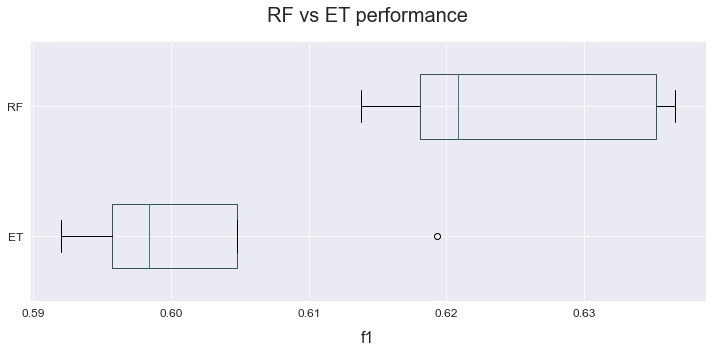

In [8]:
# Visualize the bootstrap results
atom.plot_results(title="RF vs ET performance")

In [9]:
# Print the results of some common metrics
atom.evaluate()

,accuracy,average_precision,balanced_accuracy,f1,jaccard,matthews_corrcoef,precision,recall,roc_auc
ET,0.869565,0.698097,0.733530,0.613402,0.442379,0.559386,0.788079,0.502110,0.859068
RF,0.870435,0.702422,0.740326,0.622785,0.452206,0.564750,0.778481,0.518987,0.857319


In [10]:
# The winner attribute calls the best model (atom.winner == atom.rf)
print(f"The winner is the {atom.winner.fullname} model!!")

The winner is the Random Forest model!!


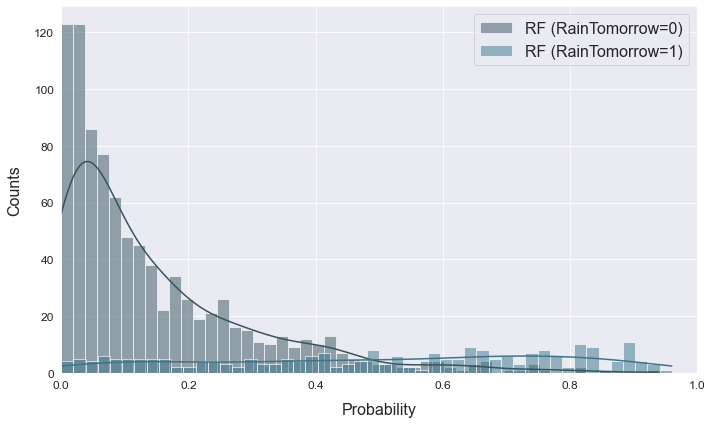

In [11]:
# Visualize the distribution of predicted probabilities
atom.winner.plot_probabilities()

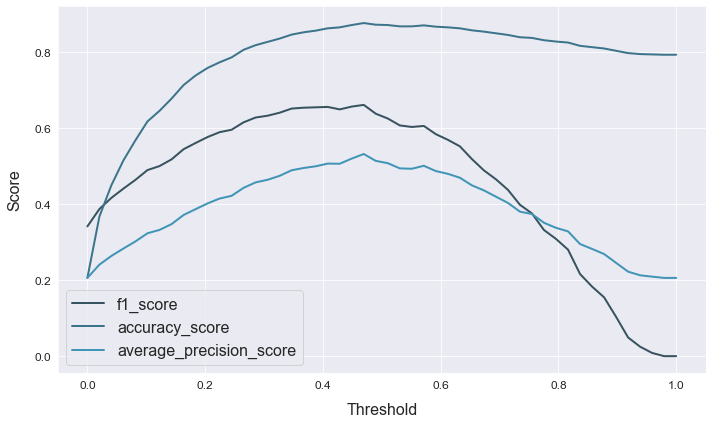

In [12]:
# Compare how different metrics perform for different thresholds
atom.winner.plot_threshold(metric=["f1", "accuracy", "average_precision"], steps=50)